# Introduction to BVPs
The goal of this lesson is to introduce/reintroduce some ideas about differential equations and boundary value problems and some python routines that can be used to analyze models with BVPs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

### Example 1
Consider the boundary value problem
$$-u'' + \pi^2 u = 2\pi^2 \sin(\pi x), u(0)=u(1)=0.$$

Since we have boundary conditions that specify the value of $u$ at the boundaries, we say they are Dirichlet boundary conditions. Note from the BVP theory we spoke about before Spring Break, this system has a unique solution.

We can solve this problem numerically by discretizing the space between $x=0$ and $x=1$ and using numerical approximations of $u''$ at each point.
Let's break up space into $n$ segments so $x_0 = 0$, $x_n = 1$, and $x_i = 0 + hi$.

Then at an interior point $x_i$ (not 0 or $n$) we have that $u_i'' = \frac{u_{i-1} -2 u_i + u_{i+1}}{h^2} + \mathcal{O}(h^2)$.

If we drop the error term in the derivative approximation, we can write our DE with the boundary conditions as the discrete system below.

$$\begin{align}
u_0 & = 0 \\
\frac{-u_{i-1} +2 u_i - u_{i+1}}{h^2} + \pi^2 u_i &= 2 \pi^2 \sin(\pi x_i) \\
u_n & = 0\end{align} $$

The equations associated with interior points can be rewritten as
$$-u_{i-1} + (2+h^2\pi^2) u_i - u_{i+1} = 2 h^2\pi^2 \sin(\pi x_i).$$



Then if we let $\vec{u} = \begin{bmatrix}u_0 \\ u_1 \\ ... \\ u_i \\ ... \\ u_n\end{bmatrix}$, we can write this system in matrix vector form $A\vec{u} = \vec{b}$.

$$ \begin{bmatrix}1 & 0 & & & & & \\-1 & (2+h^2\pi^2) & -1 & & & & \\ 0 & -1 & (2+h^2\pi^2) & -1 & & & \\  &  .  & . & . & & & \\ & & & &-1 & (2+h^2\pi^2) & -1 \\ & & & & & 0 & 1 \end{bmatrix} \begin{bmatrix}u_0 \\ u_1 \\ ... \\ u_i \\ ... \\ u_n\end{bmatrix} = \begin{bmatrix}0 \\ 2 h^2\pi^2 \sin(\pi x_1) \\ ... \\ 2 h^2\pi^2 \sin(\pi x_i) \\ ... \\ 0 \end{bmatrix}
$$

[[0.00000000e+00 1.27182109e-03 2.41914747e-03 3.32967084e-03
  3.91426283e-03 4.11569950e-03 3.91426283e-03 3.32967084e-03
  2.41914747e-03 1.27182109e-03 1.22464680e-16]]
0.004115699496889835


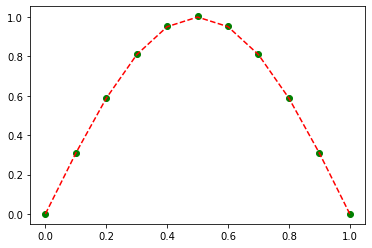

In [7]:
n = 10 #number of segments
x = np.linspace(0,1,n+1) #n+1 equally spaced points between 0 and 1
h = (1.-0.)/n #step size
A = np.zeros((n+1,n+1))  #zero matrix with shape n+1 by n+1
b = np.zeros((n+1,1)) #RHS vector

#Boundary Conditions
A[0,0] = 1.  #update first row
b[0] = 0.

A[n,n] = 1.  #update last row
b[n] = 0.

#interior points
for i in range(1,n):
    A[i,i-1] = -1.
    A[i,i] = 2. + h**2*np.pi**2
    A[i,i+1] = -1.
    b[i] = 2.*h**2*np.pi**2*np.sin(np.pi*x[i])

u = np.linalg.solve(A,b)

#compare with exact
uexact = np.sin(np.pi*x)
errors = np.abs(uexact - u.T)
print(errors)
print(np.max(errors))

plt.plot(x,u,'go',x,uexact,'r--');







## Example 2

Consider the BVP 

$$ u'' + u = \sin(3x),$$

with boundary conditions $u(0) + u'(0)= -1$, and $u'(\pi/2) = 1$.
The BC at $x=0$ is called a Robin boundary condition and the BC at $x=\pi/2$ is a Neumann boundary condition.

We can discretize similarly to above for interior points, but note that at $x=0$ we could use $u(0) + u'(0)= -1 = u_0 + \frac{u_0 - u_1}{h} + \mathcal{O}(h) = 1 $. This isn't good however because we have a second order approximation for the $u''$ terms in the interior and only a first order approximation on the boundary. We should use a second order approximation, e.g. $u(0) + u'(0)= -1 = u_0 + \frac{-3u_0 + 4u_1 - u_2}{2h} + \mathcal{O}(h^2) = -1 $.  


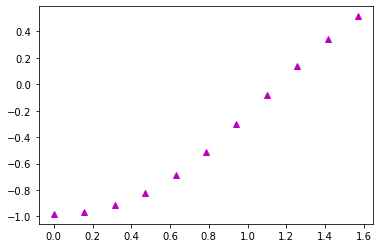

In [10]:
n = 10
x = np.linspace(0,np.pi/2.,n+1)
h = np.pi/2 / n

A = np.zeros((n+1,n+1))
b = np.zeros((n+1,1))

#BCs
A[0,0] = 1.-3./(2.*h)
A[0,1] = 4./(2.*h)
A[0,2] = -1./(2.*h)
b[0] = -1
A[n,n-2] = -1./(2.*-1.*h)
A[n,n-1] = 4./(2.*-1.*h)
A[n,n] = -3./(2.*-1.*h)
b[n] = 1.

#interior points
for i in range(1,n):
    A[i,i-1] = 1./(h**2)
    A[i,i] = 1. - 2./(h**2)
    A[i,i+1] = 1./(h**2)
    b[i] = np.sin(3.*x[i])
    
u = np.linalg.solve(A,b)

plt.plot(x,u,'m^');


Consider the Pixar short "For the birds."

<div>
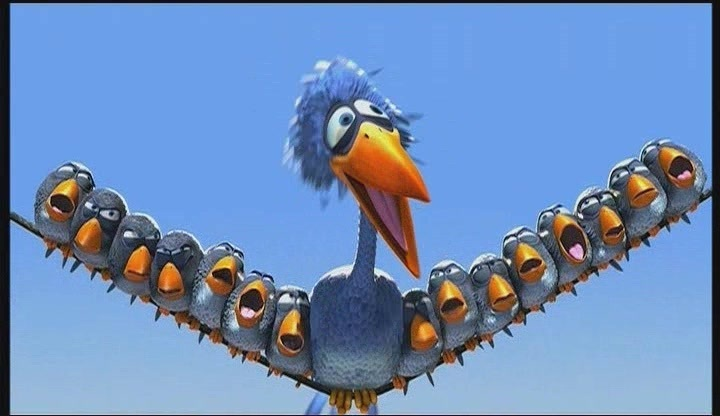
</div>

In the video the birds land on a telephone wire and the wire sags. 
Note that while this video in animated, Pixar doesn't 'draw' a sagging wire, they model the physics of the system and let the computer calculate where the wire should be using solutions to boundary value problems. In this lab we'll look at a couple example cases of the types of calculations modeling this situation.

Let's modify this situation a bit and consider that instead of a flexible wire under tension, we have a beam (say of wood or steel) that obeys the [Euler-Bernoulli beam theory](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory) equations. 

Let's assume the beam is suspended between supports 10 meters high and 10 meters apart, there are no external weights on the beam, and that $f(x)/EI = -.01$ along the beam.

### $EI \frac{d^4y}{dx^4} = f(x)$

Let $y^{(4)}(x) = f(x)/EI$. Then if we use a second order center difference scheme for $y^{(4)}(x_i)$ we have
$$\frac{y_{i-2} - 4y_{i-1} + 6y_i - 4y_{i+1} + y_{i+2} }{h^4} = \frac{f(x_i)}{EI}. $$

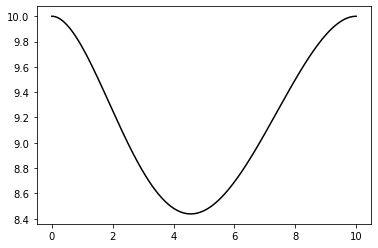

In [14]:
L = 10.  #10 meter bridge
n = 200  #each segment .05 meter
h = L/n
x = np.linspace(0,L,n+1)

A = np.zeros((n+1,n+1))
b = np.ones(n+1)

A[0,0] = 1. #Left BC
A[n,n] = 1. #Right BC
A[1,0:3] = np.array([-3.,4.,-1])/(2*h)
A[n-1,n-2:n+1] = np.array([-1,4.,-3])/(2.*h)
#A[1,1:7] = np.array([3.,-14.,26.,-24.,11.,-2.])/(h*h*h*h)
#A[n-1,n-6:n] = np.array([-2.,11.,-24.,26,-14.,3.])/(h*h*h*h)
for i in range(2,n-1):
    A[i,i-2] = 1./(h*h*h*h)
    A[i,i-1] = -4./(h*h*h*h)
    A[i,i] = 6./(h*h*h*h)
    A[i,i+1] = -4./(h*h*h*h)
    A[i,i+2] = 1./(h*h*h*h)

#no cars on bridge
b = -0.01*np.ones(n+1)
b[5:105] = -0.1*np.ones(100) #one car on left side
b[0] = 10.
b[n] = 10. #BC
b[1] = 0.
b[n-1] = 0.

y_nb = np.linalg.solve(A,b);
plt.plot(x,y_nb,'k');